# Location Based Safety Predictor

## Basic Analysis of Dataset
* dataset: [Chicago Crime dataset](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)

In [1]:
## Import necessary packages
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set pandas's max row display
pd.set_option('display.max_row', 1000)

# Set pandas's max column width to 50
pd.set_option('display.max_columns', 50)

In [2]:
# Load in the Chicago crime dataset
df = pd.read_csv('data/Chicago_Crimes_Combined.csv')

### View subset of data

In [3]:
## Print first 5 lines of dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12342615,JE202211,04/17/2021 03:20:00 PM,081XX S PRAIRIE AVE,0325,ROBBERY,VEHICULAR HIJACKING,RESIDENCE,True,False,631,6,6.0,44,03,1179448.0,1851073.0,2021,09/14/2023 03:41:59 PM,41.746626,-87.618032,"(41.746626309, -87.618031954)"
1,26262,JE366265,09/08/2021 04:45:00 PM,047XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CAR WASH,True,False,1131,11,24.0,25,01A,1144907.0,1896933.0,2021,09/14/2023 03:41:59 PM,41.873191,-87.743447,"(41.873191445, -87.743446563)"
2,13209581,JG422927,08/01/2021 12:00:00 AM,012XX E 78TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,411,4,8.0,45,17,NaN,NaN,2021,09/14/2023 03:43:09 PM,NaN,NaN,NaN
3,13209369,JG422777,12/10/2021 12:00:00 AM,036XX S NORMAL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,915,9,11.0,60,11,NaN,NaN,2021,09/14/2023 03:43:09 PM,NaN,NaN,NaN
4,12610088,JF134608,09/01/2021 12:01:00 AM,066XX S GREEN ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,False,723,7,16.0,68,02,NaN,NaN,2021,09/15/2023 03:41:25 PM,NaN,NaN,NaN


In [4]:
## Print last 5 lines of dataset
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
630569,27322,JG131679,01/27/2023 02:06:00 PM,095XX S BENNETT AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,431,4,7.0,51,01A,1190517.0,1842023.0,2023,02/08/2023 03:40:16 PM,41.721533,-87.577764,"(41.721532572, -87.577764122)"
630570,27334,JG145885,02/08/2023 11:24:00 PM,025XX S WABASH AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,133,1,3.0,33,01A,1177151.0,1887463.0,2023,02/15/2023 03:41:05 PM,41.846536,-87.625350,"(41.846536062, -87.625350476)"
630571,27435,JG224023,04/15/2023 07:35:00 AM,005XX N LAMON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1532,15,37.0,25,01A,1143593.0,1903311.0,2023,04/22/2023 03:41:17 PM,41.890718,-87.748111,"(41.890718131, -87.74811127)"
630572,27289,JG107068,01/06/2023 09:25:00 PM,056XX S THROOP ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,713,7,16.0,67,01A,1168619.0,1867434.0,2023,04/13/2023 03:40:28 PM,41.791763,-87.657241,"(41.791763159, -87.657240734)"
630573,27577,JG307916,06/20/2023 12:42:00 PM,038XX W GLADYS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1133,11,28.0,26,01A,1150764.0,1898079.0,2023,06/27/2023 03:43:37 PM,41.876224,-87.721913,"(41.876223731, -87.721912515)"


In [5]:
for i in df.columns :
    print(i)

ID
Case Number
Date
Block
IUCR
Primary Type
Description
Location Description
Arrest
Domestic
Beat
District
Ward
Community Area
FBI Code
X Coordinate
Y Coordinate
Year
Updated On
Latitude
Longitude
Location


## What crimes are most prevalent in Chicago?

In [6]:
## Check if any rows are missing data and are null
df['Primary Type'].isnull().values.any()

False

In [7]:
## Count number of observations for each crime
df['Primary Type'].value_counts()

THEFT                                135072
BATTERY                              112616
CRIMINAL DAMAGE                       73618
ASSAULT                               57082
MOTOR VEHICLE THEFT                   52885
DECEPTIVE PRACTICE                    45268
OTHER OFFENSE                         39372
WEAPONS VIOLATION                     24094
ROBBERY                               24071
BURGLARY                              19403
NARCOTICS                             13572
CRIMINAL TRESPASS                     10941
OFFENSE INVOLVING CHILDREN             5053
CRIMINAL SEXUAL ASSAULT                4183
SEX OFFENSE                            3266
HOMICIDE                               1984
PUBLIC PEACE VIOLATION                 1922
ARSON                                  1302
STALKING                               1165
INTERFERENCE WITH PUBLIC OFFICER       1117
PROSTITUTION                            555
LIQUOR LAW VIOLATION                    521
CONCEALED CARRY LICENSE VIOLATIO

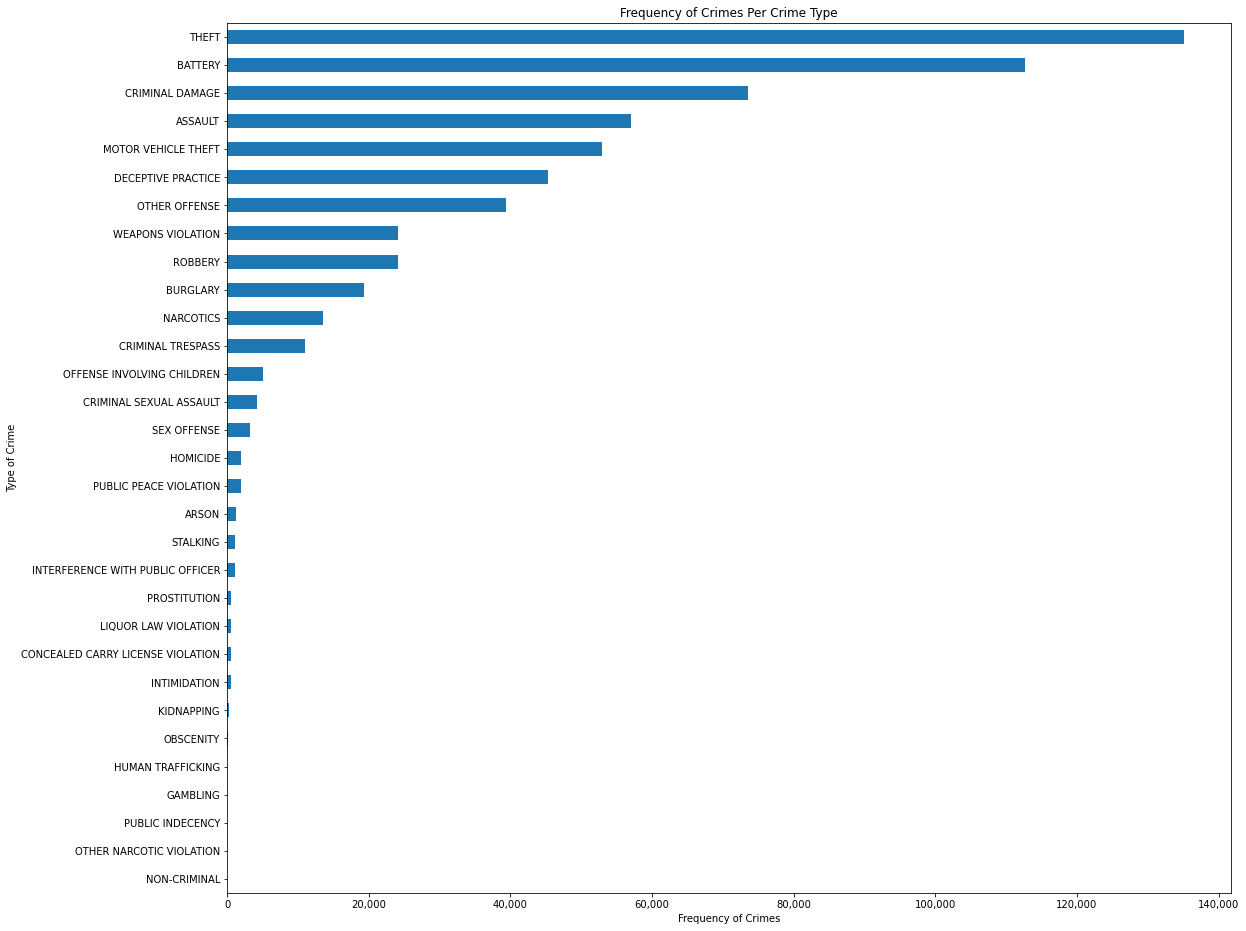

In [8]:
## Plot these for better visualization
crime_type_df = df['Primary Type'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


## What year had the most crime?

In [9]:
## Check if any rows are missing data and are null
df['Year'].isnull().values.any()

False

In [10]:
## Count number of reported crimes for each year
df['Year'].value_counts()

2022    238936
2021    208867
2023    182771
Name: Year, dtype: int64

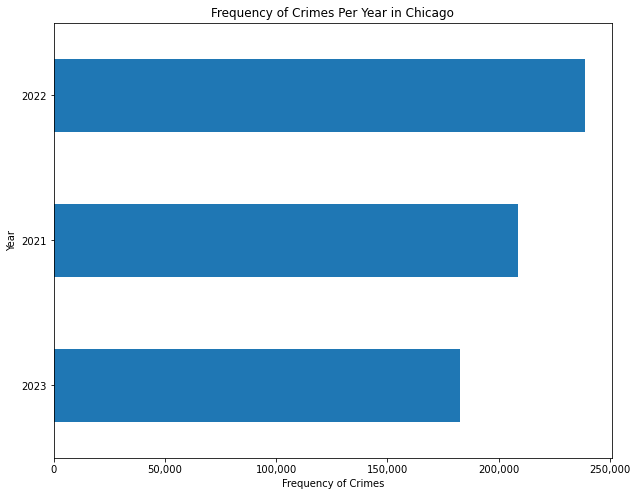

In [11]:
## Plot these for better visualization
crime_year_df = df['Year'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Chicago")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = crime_year_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

## What percentage of arrests were successful?

In [12]:
## Check if any rows are missing data and are null
df['Arrest'].isnull().values.any()

False

In [13]:
## Count number of successful arrests for each year
df['Arrest'].value_counts()

False    555040
True      75534
Name: Arrest, dtype: int64

In [14]:
## Convert values into percentages
arrest_df = df['Arrest'].value_counts()
arrest_percent = (arrest_df / df['Arrest'].sum()) * 100 

## Rename Series.name
arrest_percent.rename("% of Arrests",inplace=True)

## Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

<AxesSubplot:ylabel='% of Arrests'>

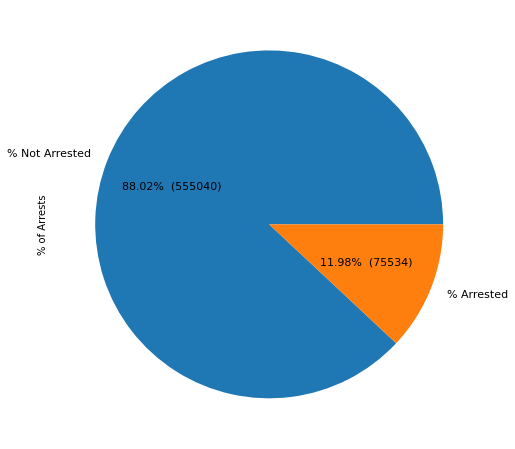

In [15]:
## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(df['Arrest'].value_counts()),
                       figsize=(8, 8))


## What are the successful arrest percentages per year?

In [16]:
## Group dataset by year and arrests
arrest_per_year = df.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2021,False,182499,87.375698
2021,True,26368,12.624302
2022,False,211152,88.371782
2022,True,27784,11.628218
2023,False,161389,88.301208
2023,True,21382,11.698792


<AxesSubplot:title={'center':'Percentages of successful arrests from 2001 to 2018'}, xlabel='Year', ylabel='Successful Arrest Percentage'>

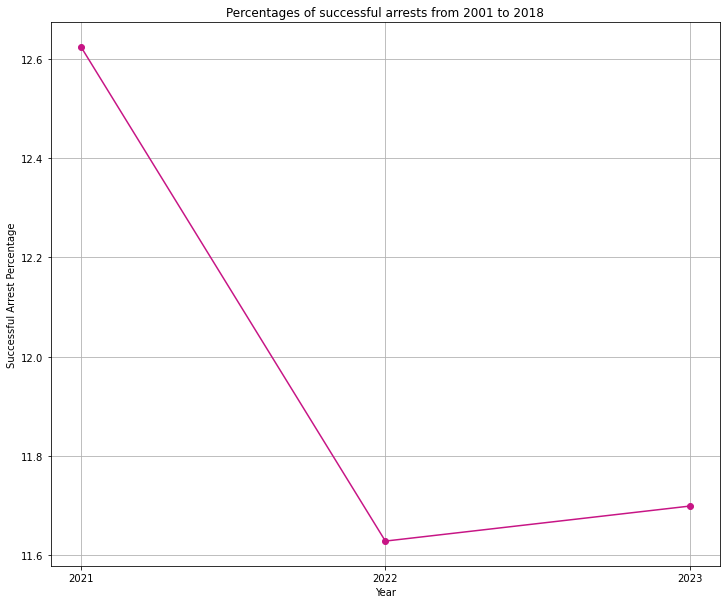

In [17]:
## Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_per_year[arrest_per_year['Arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 2001 to 2018')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')


## Data visualization for crimes commited since this month started

In [18]:
import datetime

## Clean data, create copy, and filter based on this month (March 2018)
cleaned_df = df[df['Latitude'].notnull() & df['Longitude'].notnull()].copy()
cleaned_df['Date Time'] = pd.to_datetime(cleaned_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
cleaned_df = cleaned_df[cleaned_df['Date Time']  > datetime.datetime(2023, 7, 31)]
print("Number of crimes in Chicago since start of August 2023: %d" % len(cleaned_df))

Number of crimes in Chicago since start of August 2023: 34679


In [19]:
## Create map and markers for each crime in Chicago March 2018 using folium 
crimes_map = folium.Map(location=[cleaned_df['Latitude'].mean(), cleaned_df['Longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(crimes_map)

In [20]:
## Create heat map of crimes in Chicago March 2018
crimes_heatmap = folium.Map(location=[cleaned_df['Latitude'].mean(), cleaned_df['Longitude'].mean()], zoom_start=10)
crimes_heatmap.add_child(plugins.HeatMap([[row[20], row[21]] for row in cleaned_df.itertuples()]))
crimes_heatmap.save("March-2018-chicago-crime-heatmap.html")
crimes_heatmap

## Data visualization for crimes based on district from 2001 to present

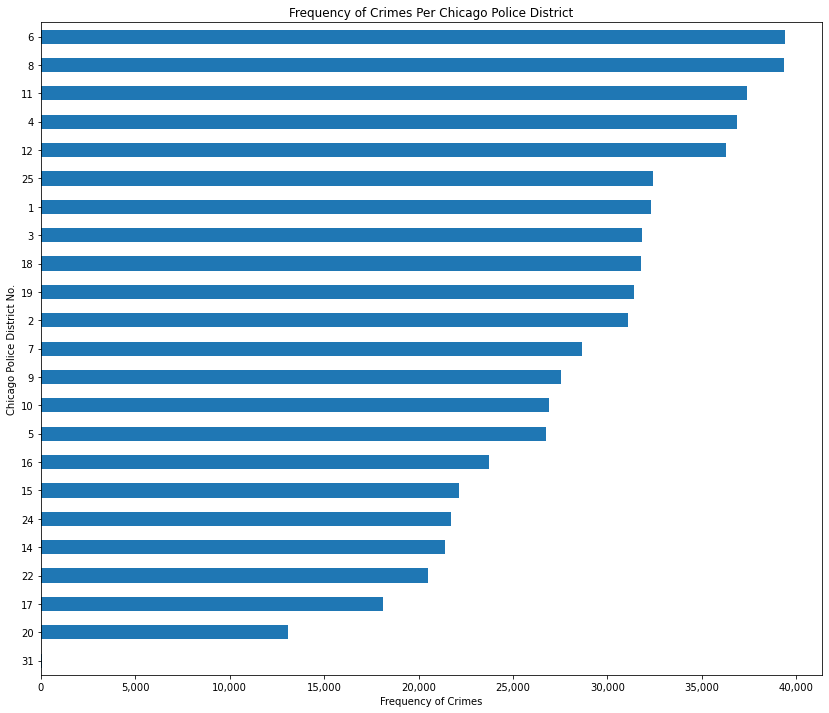

In [21]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


In [22]:
## Reset index and name the district and crime count columns
district_crime = district_crime.reset_index()
district_crime.columns = ['District', 'Count']

In [23]:
# creation of the choropleth
geo_path = 'data/Boundaries - Police Districts (current).geojson'
district_map = folium.Map(location=[cleaned_df['Latitude'].mean(), cleaned_df['Longitude'].mean()], zoom_start=10)
threshold_scale = list(np.linspace(0,40000,8))
district_map.choropleth(geo_data=geo_path,
              name='choropleth',
              data = district_crime,
              threshold_scale=threshold_scale,
              columns = ['District', 'Count'],
              key_on = 'feature.properties.dist_num',
              fill_color = 'YlOrRd',
              fill_opacity = 0.7,
              line_opacity = 0.2,
              legend_name = 'Frequency of crimes per district',
              highlight=True)


district_map.save("Crime-per-district-choropleth.html")
district_map

c:\Users\soumy\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Probability of Successful Arrest